**Mounting the google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_curve, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
pd.set_option('display.max_columns',None)

**Loading dataset**

In [ ]:
#Importing datasets
CD=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodSoft/Task 4: Fraud Detection/creditcard.csv')

**EDA**

In [ ]:
CD.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
CD.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
CD.shape

(284807, 31)

In [ ]:
CD.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
CD[CD['Class']==1].shape

(492, 31)

In [ ]:
CD[CD['Class']==0].shape

(284315, 31)

In [ ]:
#Handling the duplicated values
CD[CD['Class']==1].duplicated().sum()

19

In [ ]:
CD[CD['Class']==0].duplicated().sum()

1062

In [ ]:
CD[(CD['Class']==1) &(CD['Class'].duplicated())]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
data=CD.drop('Time',axis=1)

In [ ]:
duplicate_rows = data.duplicated()
duplicate_data = data[duplicate_rows]
print(duplicate_data)

              V1        V2        V3        V4        V5        V6        V7  \
33     -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  0.711206   
35     -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983  0.693039   
113     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
114     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
115     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
...          ...       ...       ...       ...       ...       ...       ...   
284708  2.018105  0.073226 -1.615154  0.351058  0.333905 -0.676284  0.050474   
284751  2.050734 -0.364010 -2.542843 -0.729357  2.388455  3.318015 -0.479138   
284775  1.955547 -0.724606 -1.706511 -0.611145  1.710907  3.914215 -1.248690   
284785  0.032887  0.545338 -1.185844 -1.729828  2.932315  3.401529  0.337434   
284793  1.971002 -0.699067 -1.697541 -0.617643  1.718797  3.911336 -1.259306   

              V8        V9       V10   

In [ ]:
data=data.drop_duplicates()

**Standardization**

In [ ]:
#Standardization of the Amount Column
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
data['Amount']=sc.fit_transform(data[['Amount']])

<ipython-input-18-ba10057a93b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount']=sc.fit_transform(data[['Amount']])


<Axes: xlabel='Class', ylabel='count'>

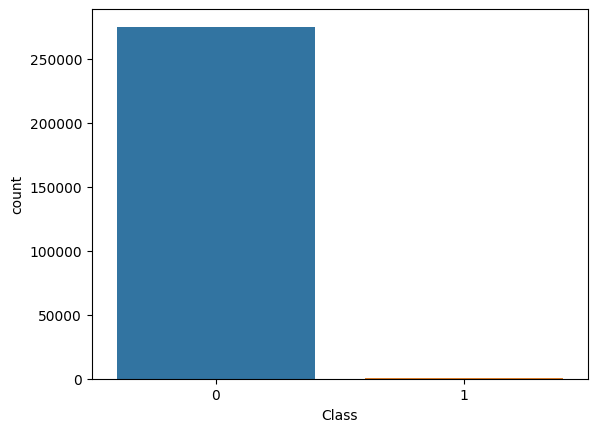

In [ ]:
#Visulization of count of Class
sns.countplot(x='Class',data=data)

**Observation: Dataset is imbalanced**

In [ ]:
#Taking dependent and independent variable
x=data.drop('Class',axis=1)
y=data['Class']

**Handling imbalanced dataset using over sampling**

In [ ]:
#oversampling for imbalance dataset
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE()

In [ ]:
x_res,y_res=sm.fit_resample(x,y)

In [ ]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

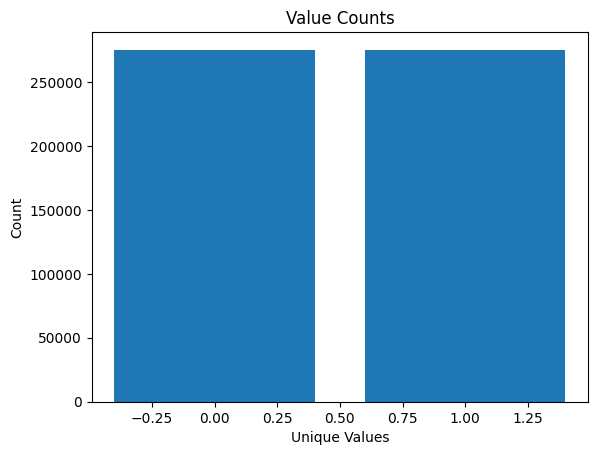

In [ ]:
# Assuming y_res is your pandas Series
counts = y_res.value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values)

# Adding labels and title
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Value Counts')

# Show the plot
plt.show()

**Observation: Dataset is balanced using over sampling**

**Splitting the dataset into train 70% and test 30%**

In [ ]:
#Dividing the dataset into train and test
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.3,random_state=42)

**Hyperparameter tuning and Model training**

**Applying Gradient boosting model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Model Training and Hyperparameter Tuning with Randomized Search
gb_clf = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [5,10],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

In [ ]:

# Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(gb_clf, param_distributions=param_dist, n_iter=3, cv=5, scoring='roc_auc', random_state=42)
random_search.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4],
                                        'n_estimators': [5, 10]},
                   random_state=42, scoring='roc_auc')

In [ ]:

# Best hyperparameters found by Randomized Search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
# Instantiate the best model with the best hyperparameters
best_gb_clf = GradientBoostingClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    random_state=42
)

In [ ]:
# Train the model with the best hyperparameters
best_gb_clf.fit(xtrain, ytrain)

GradientBoostingClassifier(n_estimators=10, random_state=42)

**Applying Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model Training and Hyperparameter Tuning with Randomized Search (Random Forest)
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Randomized Search (Random Forest)
param_dist_rf = {
    'n_estimators': [5, 10],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Randomized Search for hyperparameter tuning (Random Forest)
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions=param_dist_rf, n_iter=3, cv=5, scoring='roc_auc', random_state=42)
random_search_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [5, 10]},
                   random_state=42, scoring='roc_auc')

In [ ]:
# Best hyperparameters found by Randomized Search (Random Forest)
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

Best Hyperparameters (Random Forest): {'n_estimators': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# Instantiate the best model with the best hyperparameters (Random Forest)
best_rf_clf = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the model with the best hyperparameters (Random Forest)
best_rf_clf.fit(xtrain, ytrain)



RandomForestClassifier(n_estimators=5, random_state=42)

**Applying Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Training and Hyperparameter Tuning with Randomized Search (Logistic Regression)
lr_clf = LogisticRegression(random_state=42)

# Hyperparameter grid for Randomized Search (Logistic Regression)
param_dist_lr = {
    'C': [0.01, 0.1],
    'penalty': ['l2']
}

# Randomized Search for hyperparameter tuning (Logistic Regression)
random_search_lr = RandomizedSearchCV(lr_clf, param_distributions=param_dist_lr, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search_lr.fit(xtrain, ytrain)

# Best hyperparameters found by Randomized Search (Logistic Regression)
best_params_lr = random_search_lr.best_params_
print("Best Hyperparameters (Logistic Regression):", best_params_lr)

# Instantiate the best model with the best hyperparameters (Logistic Regression)
best_lr_clf = LogisticRegression(
    C=best_params_lr['C'],
    penalty=best_params_lr['penalty'],
    random_state=42
)

# Train the model with the best hyperparameters (Logistic Regression)
best_lr_clf.fit(xtrain, ytrain)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters (Logistic Regression): {'penalty': 'l2', 'C': 0.1}


LogisticRegression(C=0.1, random_state=42)

**Feedforward neural network**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Model Training and Hyperparameter Tuning with Randomized Search (Neural Networks)
nn_clf = MLPClassifier(random_state=42)

# Hyperparameter grid for Randomized Search (Neural Networks)
param_dist_nn = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'alpha': [0.001, 0.01],
    'learning_rate': ['constant']
}

# Randomized Search for hyperparameter tuning (Neural Networks)
random_search_nn = RandomizedSearchCV(nn_clf, param_distributions=param_dist_nn, n_iter=3, cv=5, scoring='roc_auc', random_state=42)
random_search_nn.fit(xtrain, ytrain)

# Best hyperparameters found by Randomized Search (Neural Networks)
best_params_nn = random_search_nn.best_params_
print("Best Hyperparameters (Neural Networks):", best_params_nn)

# Instantiate the best model with the best hyperparameters (Neural Networks)
best_nn_clf = MLPClassifier(
    hidden_layer_sizes=best_params_nn['hidden_layer_sizes'],
    alpha=best_params_nn['alpha'],
    learning_rate=best_params_nn['learning_rate'],
    random_state=42
)

# Train the model with the best hyperparameters (Neural Networks)
best_nn_clf.fit(xtrain, ytrain)



Best Hyperparameters (Neural Networks): {'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001}


MLPClassifier(alpha=0.001, hidden_layer_sizes=(50, 50), random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return accuracy, precision, recall, f1, roc_auc


In [ ]:
# Evaluate Gradient Boosting
print("Gradient Boosting Results:")
gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc_auc = evaluate_model(best_gb_clf, xtest, ytest)

# Evaluate Random Forest
print("Random Forest Results:")
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(best_rf_clf, xtest, ytest)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc_auc = evaluate_model(best_lr_clf, xtest, ytest)

# Evaluate Neural Networks
print("Neural Networks Results:")
nn_accuracy, nn_precision, nn_recall, nn_f1, nn_roc_auc = evaluate_model(best_nn_clf, xtest, ytest)

# Print the evaluation metrics for all models
print("Gradient Boosting:")
print("Accuracy:", gb_accuracy)
# print("Precision:", gb_precision)
# print("Recall:", gb_recall)
# print("F1 Score:", gb_f1)
print("ROC AUC Score:", gb_roc_auc)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
# print("Precision:", rf_precision)
# print("Recall:", rf_recall)
# print("F1 Score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
# print("Precision:", lr_precision)
# print("Recall:", lr_recall)
# print("F1 Score:", lr_f1)
print("ROC AUC Score:", lr_roc_auc)

print("Neural Networks:")
print("Accuracy:", nn_accuracy)
# print("Precision:", nn_precision)
# print("Recall:", nn_recall)
# print("F1 Score:", nn_f1)
print("ROC AUC Score:", nn_roc_auc)


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     82643
           1       0.98      0.90      0.93     82471

    accuracy                           0.94    165114
   macro avg       0.94      0.94      0.94    165114
weighted avg       0.94      0.94      0.94    165114

Confusion Matrix:
[[80929  1714]
 [ 8645 73826]]
Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82643
           1       1.00      1.00      1.00     82471

    accuracy                           1.00    165114
   macro avg       1.00      1.00      1.00    165114
weighted avg       1.00      1.00      1.00    165114

Confusion Matrix:
[[82606    37]
 [   15 82456]]
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     82643
           1       0.97      0.91      0.94     82471

    a

**Best performing model Random Forest and Neural Networks with accuracy 0.999**

In [ ]:
# For Gradient Boosting
gb_probs = best_gb_clf.predict_proba(xtest)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(ytest, gb_probs)
gb_roc_auc = roc_auc_score(ytest, gb_probs)

# For Random Forest
rf_probs = best_rf_clf.predict_proba(xtest)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)
rf_roc_auc = roc_auc_score(ytest, rf_probs)

# For Logistic Regression
lr_probs = best_lr_clf.predict_proba(xtest)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
lr_roc_auc = roc_auc_score(ytest, lr_probs)



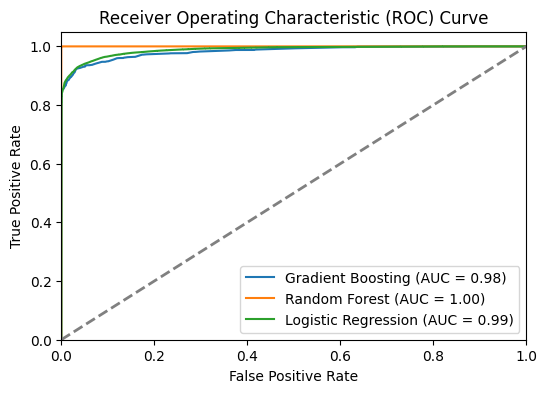

In [ ]:
plt.figure(figsize=(6, 4))

# Plot ROC curves
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(gb_roc_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_roc_auc))

# Add diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


**Best performing Random Forest.**